<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(0_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.8_n250.csv',
 'data_multi_delta_0.8_n120.csv',
 'data_multi_delta_0.8_n60.csv',
 'data_multi_delta_0.8_n30.csv',
 'data_multi_delta_0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.766082,65.749741,36.897946,9.155820,220.569590,214.629698,5.939891
1,0.0,1.0,52.337549,58.638416,82.687940,3.250482,206.914387,203.516979,3.397408
2,0.0,2.0,45.476165,79.083289,97.219802,8.428531,240.207787,233.024105,7.183682
3,0.0,3.0,74.021728,51.761058,32.476923,-0.597678,167.662031,167.603682,0.058349
4,0.0,4.0,95.421556,73.604032,56.079161,-1.450525,233.654224,239.419012,-5.764787
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.671340,30.462156,91.330538,4.161429,170.625462,169.278873,1.346589
19996,999.0,16.0,65.126670,51.578863,93.380305,5.817596,225.903435,222.834010,3.069426
19997,999.0,17.0,49.705626,73.212704,60.986364,3.058041,196.962735,193.553770,3.408965
19998,999.0,18.0,83.476847,46.756974,69.646442,2.091491,211.971754,212.066906,-0.095151


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.766082,65.749741,36.897946,9.155820,220.569590,214.629698,5.939891
1,0.0,1.0,52.337549,58.638416,82.687940,3.250482,206.914387,203.516979,3.397408
2,0.0,2.0,45.476165,79.083289,97.219802,8.428531,240.207787,233.024105,7.183682
3,0.0,3.0,74.021728,51.761058,32.476923,-0.597678,167.662031,167.603682,0.058349
4,0.0,4.0,95.421556,73.604032,56.079161,-1.450525,233.654224,239.419012,-5.764787
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.671340,30.462156,91.330538,4.161429,170.625462,169.278873,1.346589
19996,999.0,16.0,65.126670,51.578863,93.380305,5.817596,225.903435,222.834010,3.069426
19997,999.0,17.0,49.705626,73.212704,60.986364,3.058041,196.962735,193.553770,3.408965
19998,999.0,18.0,83.476847,46.756974,69.646442,2.091491,211.971754,212.066906,-0.095151


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    98.766082  65.749741  36.897946  9.155820  220.569590   
      1.0    52.337549  58.638416  82.687940  3.250482  206.914387   
      2.0    45.476165  79.083289  97.219802  8.428531  240.207787   
      3.0    74.021728  51.761058  32.476923 -0.597678  167.662031   
      4.0    95.421556  73.604032  56.079161 -1.450525  233.654224   
...                ...        ...        ...       ...         ...   
999.0 15.0   34.671340  30.462156  91.330538  4.161429  170.625462   
      16.0   65.126670  51.578863  93.380305  5.817596  225.903435   
      17.0   49.705626  73.212704  60.986364  3.058041  196.962735   
      18.0   83.476847  46.756974  69.646442  2.091491  211.971754   
      19.0   64.127761  57.012059  59.490356 -6.774874  183.855302   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    214.629698  5.939891  
      1.0    203.516979  3.397408  
      2.0    233.024105  7.183682  
      3.0    167.603682  0.058349  
      4.0    239.419012 -5.764787  
...                 ...       ...  
999.0 15.0   169.278873  1.346589  
      16.0   222.834010  3.069426  
      17.0   193.553770  3.408965  
      18.0   212.066906 -0.095151  
      19.0   191.311577 -7.456274  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    98.766082  65.749741  36.897946  9.155820  220.569590   
      1.0    52.337549  58.638416  82.687940  3.250482  206.914387   
      2.0    45.476165  79.083289  97.219802  8.428531  240.207787   
      3.0    74.021728  51.761058  32.476923 -0.597678  167.662031   
      4.0    95.421556  73.604032  56.079161 -1.450525  233.654224   
...                ...        ...        ...       ...         ...   
999.0 15.0   34.671340  30.462156  91.330538  4.161429  170.625462   
      16.0   65.126670  51.578863  93.380305  5.817596  225.903435   
      17.0   49.705626  73.212704  60.986364  3.058041  196.962735   
      18.0   83.476847  46.756974  69.646442  2.091491  211.971754   
      19.0   64.127761  57.012059  59.490356 -6.774874  183.855302   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    214.629698  5.939891  
      1.0    203.516979  3.397408  
      2.0    233.024105  7.183682  
      3.0    167.603682  0.058349  
      4.0    239.419012 -5.764787  
...                 ...       ...  
999.0 15.0   169.278873  1.346589  
      16.0   222.834010  3.069426  
      17.0   193.553770  3.408965  
      18.0   212.066906 -0.095151  
      19.0   191.311577 -7.456274  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.766082,65.749741,36.897946,9.155820,220.569590,214.629698,5.939891
1,0.0,1.0,52.337549,58.638416,82.687940,3.250482,206.914387,203.516979,3.397408
2,0.0,2.0,45.476165,79.083289,97.219802,8.428531,240.207787,233.024105,7.183682
3,0.0,3.0,74.021728,51.761058,32.476923,-0.597678,167.662031,167.603682,0.058349
4,0.0,4.0,95.421556,73.604032,56.079161,-1.450525,233.654224,239.419012,-5.764787
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.671340,30.462156,91.330538,4.161429,170.625462,169.278873,1.346589
19996,999.0,16.0,65.126670,51.578863,93.380305,5.817596,225.903435,222.834010,3.069426
19997,999.0,17.0,49.705626,73.212704,60.986364,3.058041,196.962735,193.553770,3.408965
19998,999.0,18.0,83.476847,46.756974,69.646442,2.091491,211.971754,212.066906,-0.095151


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    98.766082  65.749741  36.897946  9.155820  220.569590   
      1.0    52.337549  58.638416  82.687940  3.250482  206.914387   
      2.0    45.476165  79.083289  97.219802  8.428531  240.207787   
      3.0    74.021728  51.761058  32.476923 -0.597678  167.662031   
      4.0    95.421556  73.604032  56.079161 -1.450525  233.654224   
...                ...        ...        ...       ...         ...   
999.0 15.0   34.671340  30.462156  91.330538  4.161429  170.625462   
      16.0   65.126670  51.578863  93.380305  5.817596  225.903435   
      17.0   49.705626  73.212704  60.986364  3.058041  196.962735   
      18.0   83.476847  46.756974  69.646442  2.091491  211.971754   
      19.0   64.127761  57.012059  59.490356 -6.774874  183.855302   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    214.629698  5.939891  
      1.0    203.516979  3.397408  
      2.0    233.024105  7.183682  
      3.0    167.603682  0.058349  
      4.0    239.419012 -5.764787  
...                 ...       ...  
999.0 15.0   169.278873  1.346589  
      16.0   222.834010  3.069426  
      17.0   193.553770  3.408965  
      18.0   212.066906 -0.095151  
      19.0   191.311577 -7.456274  

[20000 rows x 7 columns]

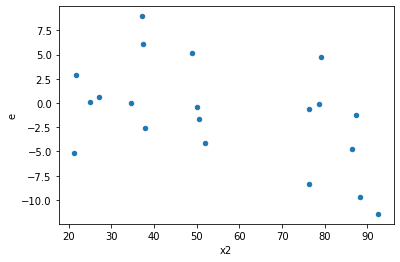

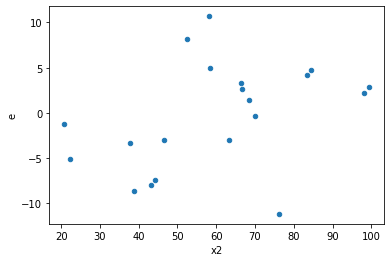

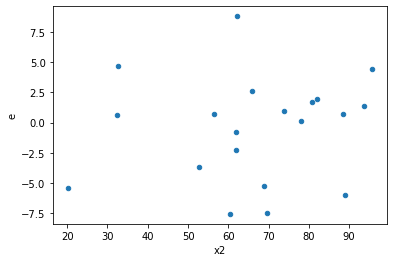

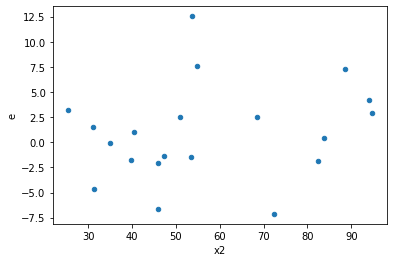

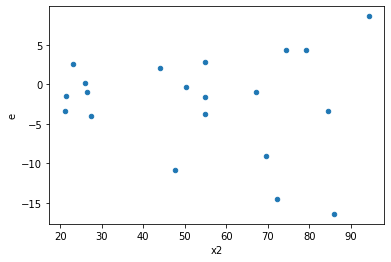

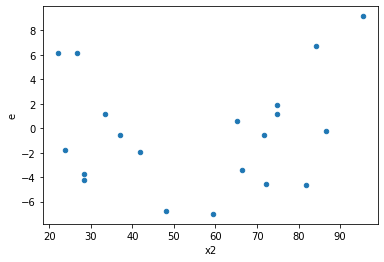

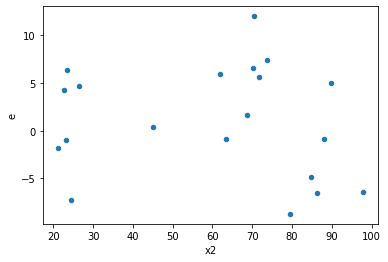

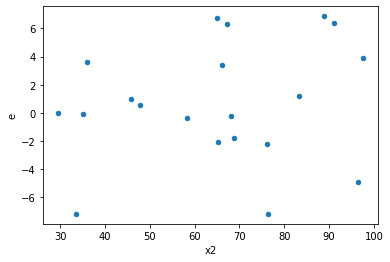

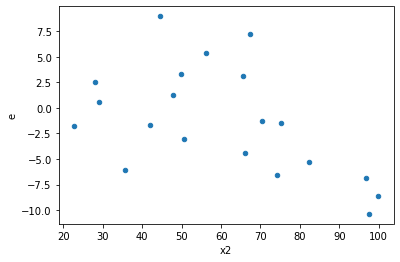

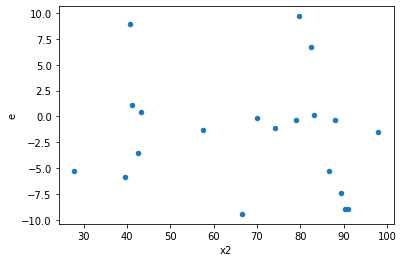

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,5.0,5.0,54.75915141656042,116.67024415796732,10.951830283312084,23.334048831593464,2.1306072344043585,0.42608649894510475,0.7869567505274476,0.21304324947255238,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,110.96426852146651,173.4846428446878,22.192853704293302,34.696928568937565,1.5634279859297813,0.635812196418247,0.6820939017908765,0.3179060982091235,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,11.225252005592498,62.69516551406048,2.2450504011184997,12.539033102812095,5.585190023602616,0.08222926718896728,0.9588853664055164,0.04111463359448364,Reject005=1 : Homoscedasticity
9.0,5.0,5.0,55.94178445090576,216.029727165878,11.18835689018115,43.2059454331756,3.8616881689833233,0.16442633725214306,0.9177868313739285,0.08221316862607153,Reject005=1 : Homoscedasticity
11.0,5.0,5.0,168.95919969089084,249.41624116422668,33.79183993817817,49.88324823284533,1.4761921317130475,0.6795306464983963,0.6602346767508018,0.33976532324919817,Reject005=1 : Homoscedasticity
12.0,5.0,5.0,3.6118686864103022,137.0610313631844,0.7223737372820604,27.412206272636883,37.94740154282965,0.0011162962476085614,0.9994418518761957,0.0005581481238042807,Reject005=0 : Heteroscedasticity
14.0,5.0,5.0,86.76236656133919,368.0964826382303,17.35247331226784,73.61929652764607,4.242582322578692,0.13871013868324056,0.9306449306583797,0.06935506934162028,Reject005=1 : Homoscedasticity
17.0,5.0,5.0,14.277266660735416,158.63528134812293,2.855453332147083,31.727056269624587,11.111040027317927,0.019432630160491682,0.9902836849197542,0.009716315080245841,Reject005=0 : Heteroscedasticity
20.0,5.0,5.0,83.50857570539907,111.28319867444864,16.701715141079813,22.256639734889728,1.3325960565658872,0.760391250594568,0.619804374702716,0.380195625297284,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,90.08043612189779,65.7888797250365,18.016087224379557,13.157775945007298,0.7303348269319022,0.7386293938763974,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,54.75915141656042,116.67024415796732,10.951830283312084,23.334048831593464,2.1306072344043585,0.42608649894510475,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,118.53451772205472,90.00835509396416,23.70690354441094,18.00167101879283,0.7593429899045944,0.7699478819967986,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,185.31835919815555,106.62229501803601,37.06367183963111,21.324459003607203,0.5753466385056208,0.5588210070256868,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,135.76859865146014,124.11448633076297,27.15371973029203,24.822897266152594,0.9141619458663255,0.9239475375991346,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,110.96426852146651,173.4846428446878,22.192853704293302,34.696928568937565,1.5634279859297813,0.635812196418247,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,300.16513546477216,226.8749967404806,60.033027092954434,45.374999348096125,0.7558339391721495,0.7662005472322583,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,118.16622923461722,24.395927694770496,23.633245846923444,4.879185538954099,0.20645431315518037,0.10830796812867395,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,11.225252005592498,62.69516551406048,2.2450504011184997,12.539033102812095,5.585190023602616,0.08222926718896728,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      890
Reject005=0 : Heteroscedasticity    110
Name: Result_test, dtype: int64